In [1]:
import torch
import torchvision
import numpy as np

In [2]:
from torchvision.datasets import MNIST

In [11]:
dataset = MNIST("./DATA",train=True, download = True)

Extracting ./DATA\MNIST\raw\train-images-idx3-ubyte.gz to ./DATA\MNIST\raw


Extracting ./DATA\MNIST\raw\train-labels-idx1-ubyte.gz to ./DATA\MNIST\raw


Extracting ./DATA\MNIST\raw\t10k-images-idx3-ubyte.gz to ./DATA\MNIST\raw


Extracting ./DATA\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./DATA\MNIST\raw
Processing...
Done!


In [12]:
test_dataset = MNIST("./DATA",train=False, download = True)

In [13]:
len(dataset)

60000

In [14]:
len(test_dataset)

10000

In [16]:
import torchvision.transforms as transforms

In [17]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [23]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In [25]:
test_dataset = MNIST(root='data/', 
                train=False,
                transform=transforms.ToTensor())

In [27]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

In [28]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [29]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


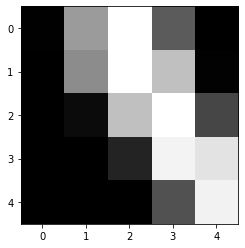

In [32]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [33]:
from torch.utils.data import DataLoader, random_split

In [34]:
train_ds, val_ds = random_split(dataset, lengths=[50000, 10000])

In [36]:
len(train_ds), len(val_ds)

(50000, 10000)

In [37]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [38]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [39]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [43]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0159, -0.0049,  0.0213,  ..., -0.0065, -0.0246,  0.0206],
        [-0.0211, -0.0069,  0.0113,  ..., -0.0198,  0.0331, -0.0016],
        [ 0.0101,  0.0355,  0.0291,  ..., -0.0343, -0.0125, -0.0084],
        ...,
        [ 0.0204, -0.0054, -0.0353,  ...,  0.0186, -0.0348,  0.0020],
        [-0.0334,  0.0285,  0.0023,  ...,  0.0169, -0.0045,  0.0311],
        [-0.0144, -0.0122, -0.0347,  ..., -0.0065,  0.0025, -0.0213]],
       requires_grad=True), Parameter containing:
tensor([ 0.0300, -0.0152,  0.0242,  0.0322,  0.0329, -0.0102,  0.0079, -0.0197,
         0.0267,  0.0260], requires_grad=True)]


In [50]:
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = Mnist_model()

In [51]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0182, -0.0217, -0.0133,  ...,  0.0318,  0.0250,  0.0152],
         [ 0.0164,  0.0311,  0.0002,  ..., -0.0116,  0.0011,  0.0343],
         [-0.0258,  0.0140, -0.0157,  ..., -0.0337,  0.0046,  0.0325],
         ...,
         [ 0.0107,  0.0182,  0.0315,  ...,  0.0310, -0.0223,  0.0182],
         [ 0.0012, -0.0276, -0.0241,  ...,  0.0015, -0.0004,  0.0095],
         [-0.0016,  0.0225, -0.0097,  ..., -0.0108, -0.0074,  0.0117]],
        requires_grad=True), Parameter containing:
 tensor([-0.0015,  0.0029, -0.0045,  0.0225, -0.0154,  0.0261, -0.0118, -0.0082,
         -0.0164,  0.0215], requires_grad=True)]

In [52]:
import torch.nn.functional as F

In [54]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0685,  0.0008, -0.2360,  0.1964,  0.1835, -0.0498, -0.0234, -0.0754,
         -0.0666,  0.2037],
        [ 0.1571, -0.0776, -0.2498, -0.1458,  0.1388, -0.0999, -0.3728, -0.2585,
          0.2321,  0.2339]])


In [55]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities:\n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1040, 0.0972, 0.0767, 0.1182, 0.1167, 0.0924, 0.0949, 0.0901, 0.0909,
         0.1191],
        [0.1197, 0.0946, 0.0797, 0.0884, 0.1175, 0.0925, 0.0704, 0.0790, 0.1290,
         0.1292]])
Sum:  1.0


In [56]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 0, 1, 0, 8, 0, 3, 3, 8, 3, 3, 0, 0, 8, 0, 0, 0, 8, 0, 4, 0, 8, 0,
        0, 0, 0, 3, 8, 0, 0, 0, 0, 4, 3, 4, 0, 4, 1, 0, 8, 8, 8, 3, 8, 5, 3, 3,
        0, 0, 8, 4, 0, 0, 3, 8, 0, 8, 0, 3, 7, 8, 8, 3, 1, 3, 0, 8, 0, 0, 0, 3,
        4, 9, 0, 8, 4, 0, 0, 9, 9, 8, 5, 0, 1, 3, 8, 4, 1, 3, 0, 8, 3, 9, 0, 0,
        0, 0, 0, 4, 0, 0, 8, 0, 8, 8, 0, 0, 9, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 3,
        0, 0, 3, 7, 0, 3, 9, 4])
tensor([0.1191, 0.1292, 0.1517, 0.1287, 0.1328, 0.1445, 0.1322, 0.1169, 0.1229,
        0.1306, 0.1240, 0.1184, 0.1326, 0.1488, 0.1329, 0.1414, 0.1211, 0.1306,
        0.1300, 0.1480, 0.1350, 0.1654, 0.1207, 0.1578, 0.1234, 0.1378, 0.1407,
        0.1400, 0.1306, 0.1175, 0.1245, 0.1489, 0.1375, 0.1281, 0.1239, 0.1371,
        0.1253, 0.1398, 0.1160, 0.1308, 0.1239, 0.1387, 0.1317, 0.1238, 0.1191,
        0.1290, 0.1218, 0.1349, 0.1523, 0.1460, 0.1507, 0.1355, 0.1884, 0.1384,
        0.1270, 0.1374, 0.1271, 0.1320, 0.1277, 0.1232, 0.1319, 0.1299, 0.1258,
       